In [1]:
#Importing required libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense

from tensorflow.keras.utils import plot_model

In [2]:
iris=load_iris()

# Exploring data

In [3]:
#Load data into a dataframe
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#Convert datatype to float
df=df.astype(float)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#open target feature and name it as label
df['label']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
#Replacing 0's and 1's with actual string names (setosa,versicolor,etc)
df['label']=df.label.replace(dict(enumerate(iris.target_names)))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df[10:100]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
10,5.4,3.7,1.5,0.2,setosa
11,4.8,3.4,1.6,0.2,setosa
12,4.8,3.0,1.4,0.1,setosa
13,4.3,3.0,1.1,0.1,setosa
14,5.8,4.0,1.2,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


# Preparing data for keras and tf

In [8]:
#One-hot encoding the target variable
label=pd.get_dummies(df['label'])
label.columns=['label_' + str(x) for x in label.columns]
df=pd.concat([df,label],axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [9]:
#Drop label column
df.drop(['label'],axis=1,inplace=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [10]:
#Creating x and y
x=df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
#Converting df into numpy array
x=np.asarray(x)

y=df[['label_setosa', 'label_versicolor', 'label_virginica']]
y=np.asarray(y)

In [11]:
print(x[:10])
print(y[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [12]:
#Splitting the dataset into a training set(75%) and a test set(25%)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

# Functional API

In [13]:
#Returns a tensor
inputs=Input(shape=(4,))

x=Dense(5,activation='relu')(inputs)
x=Dense(10,activation='relu')(x)
outputs=Dense(3,activation='softmax')(x)

#This creates a model having input layer and 3 dense layers
model_fun_api=Model(inputs=inputs, outputs=outputs)
model_fun_api.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 25        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Compiling the model
model_fun_api.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [16]:
#Fitting the model
history=model_fun_api.fit(x_train,y_train,batch_size=64,epochs=30,validation_split=0.2)  
#validation_split is cross validation (20% of data goes to dev), epochs= cycle of 1fb and 1bp, 
#batch size=sample of data from entire dataset

Train on 89 samples, validate on 23 samples
Epoch 1/30
89/89 [==============================] - 2s 18ms/sample - loss: 1.6869 - accuracy: 0.3034 - val_loss: 1.6577 - val_accuracy: 0.3478
Epoch 2/30
89/89 [==============================] - 0s 372us/sample - loss: 1.6445 - accuracy: 0.3034 - val_loss: 1.6157 - val_accuracy: 0.3043
Epoch 3/30
89/89 [==============================] - 0s 436us/sample - loss: 1.6059 - accuracy: 0.2921 - val_loss: 1.5755 - val_accuracy: 0.3043
Epoch 4/30
89/89 [==============================] - 0s 458us/sample - loss: 1.5650 - accuracy: 0.2921 - val_loss: 1.5366 - val_accuracy: 0.3043
Epoch 5/30
89/89 [==============================] - 0s 470us/sample - loss: 1.5272 - accuracy: 0.2921 - val_loss: 1.4990 - val_accuracy: 0.3043
Epoch 6/30
89/89 [==============================] - 0s 513us/sample - loss: 1.4896 - accuracy: 0.2809 - val_loss: 1.4626 - val_accuracy: 0.3043
Epoch 7/30
89/89 [==============================] - 0s 679us/sample - loss: 1.4580 - accuracy

In [17]:
def plot_metric(history,metric):
    train_metrics=history.history[metric]
    val_metrics=history.history['val_' + metric]
    epochs=range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro--')
    plt.title('Training and validation ' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend(['train_' + metric, 'val_' + metric])
    plt.show()

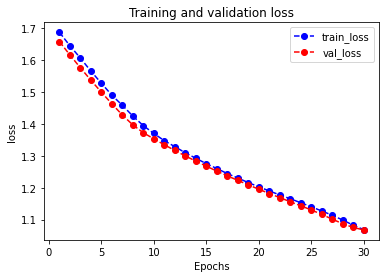

In [18]:
plot_metric(history, 'loss')

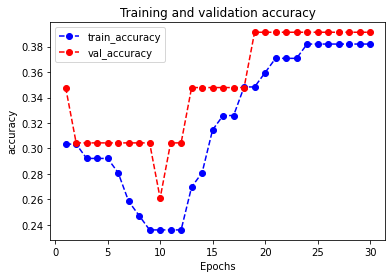

In [19]:
plot_metric(history,'accuracy')

In [20]:
#Evaluating the model with test data
model_fun_api.evaluate(x=x_test, y=y_test)

38/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.0794362457175004, 0.18421052]

# Multi i/p and o/p model (2 i/ps and 1 o/p)

In [21]:
#2 inputs: 1 structured data and other is image data
input_s=Input(shape=(4,), name='input_s')
input_i=Input(shape=(256,), name='input_i')

#Middle layers
x1=Dense(10,activation='relu')(input_s)
x2=Dense(100,activation='relu')(input_i)

c=concatenate([x1,x2])

outputs=Dense(3, activation='softmax', name='outputs')(c)

model=Model(inputs=[input_s, input_i], outputs=outputs)

In [22]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_s (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
input_i (InputLayer)            [(None, 256)]        0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 10)           50          input_s[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 100)          25700       input_i[0][0]                    
____________________________________________________________________________________________

# 1 i/p and 2 o/ps


In [23]:
#one input
input_i=Input(shape=(256,), name='input_i')

#middle layer
x=Dense(300, activation='relu')(input_i)

#2 output layers
output1=Dense(1, activation='sigmoid', name='output1')(x)
output2=Dense(3, activation='softmax', name='output2')(x)

model=Model(inputs=input_i, outputs=[output1, output2])

In [24]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_i (InputLayer)            [(None, 256)]        0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 300)          77100       input_i[0][0]                    
__________________________________________________________________________________________________
output1 (Dense)                 (None, 1)            301         dense_5[0][0]                    
__________________________________________________________________________________________________
output2 (Dense)                 (None, 3)            903         dense_5[0][0]                    
Total params: 78,304
Trainable params: 78,304
Non-trainable params: 0
______________________

# 2 i/ps and 2 o/ps

In [25]:
#2 inputs: 1 structured data and other is image data
input_s=Input(shape=(4,), name='input_s')
input_i=Input(shape=(256,), name='input_i')

#Middle layers
x1=Dense(10,activation='relu')(input_s)
x2=Dense(300,activation='relu')(input_i)

c=concatenate([x1,x2])

#2 output layers
output1=Dense(1, activation='sigmoid', name='output1')(c)
output2=Dense(3, activation='softmax', name='output2')(c)

model=Model(inputs=[input_s, input_i], outputs=[output1, output2])

In [26]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_s (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
input_i (InputLayer)            [(None, 256)]        0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 10)           50          input_s[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 300)          77100       input_i[0][0]                    
____________________________________________________________________________________________

We can plot the model by using google colab